In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, tree, model_selection 
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
#importing iris datasets from datasets embedded in sklearn
iris = datasets.load_iris()

In [5]:
#the file is stored as dict so the ey function is used to access it
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(f'The shape of the feature variables is {iris.data.shape}\n\
The shape of the target variable is {iris.target.shape}')

The shape of the feature variables is (150, 4)
The shape of the target variable is (150,)


In [42]:
#the target variable are represented by nominal values bcos they are categorical variables
#iris.target

In [45]:
#to show the total number in each category in the target variable use the np.bincount() function
np.bincount(iris.target)

array([50, 50, 50], dtype=int32)

In [51]:
#species of iris flower
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

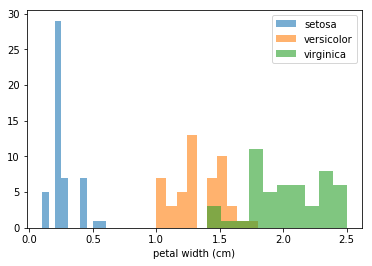

In [7]:
#histogram of the petal width of each of the species

x_index = 3 #the column 3 in the iris.data which is the petal width
for specie in range(len(iris.target_names)):
    plt.hist(iris.data[iris.target == specie , x_index], label =  iris.target_names[specie],\
    alpha = 0.6)
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc = 'upper right')
plt.show()

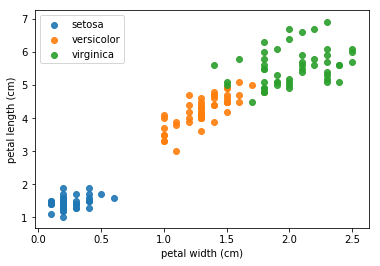

In [8]:
x_index = 3 #the column 3 in the iris.data which is the petal width
y_index = 2 #the column 1 in the iris.data which is the sepal length

for specie in range(len(iris.target_names)):
    plt.scatter(iris.data[iris.target == specie , x_index], iris.data[iris.target == specie, y_index],\
                label =  iris.target_names[specie], alpha = 0.9)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc = 'upper left')
plt.show()

'''iris.data[iris.target == specie , x_index] #subsets the iris.data from where the target = the specie\
in the feature_names 
iris.data[iris.target == specie, y_index] #subsets the iris.data where the target = the specie in the\
features_names
'''

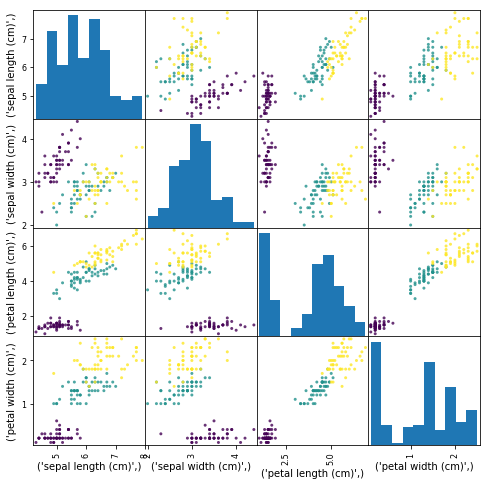

In [9]:
#plotting a scatter matrix of all the feature names
iris_df = pd.DataFrame(iris.data, columns= [iris.feature_names])
pd.plotting.scatter_matrix(iris_df, diagonal = 'hist', c= iris.target, figsize = [8,8], alpha = 0.8 );

To get data from sklearn
the data come in 3 forms: packaged, downloadable and generated data which r assessed using
sklearn.datasets.load_*
sklearn.datasets.fetch_*
sklearn.datasets.make_* respectively

In [125]:
#the features
X = iris.data

In [126]:
#target variable
y = iris.target

In [130]:
#helps to split the data into train and test samples
from sklearn.model_selection import train_test_split

In [140]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.5, train_size =0.5,\
                                                   random_state = 123)
print(f'Labels for training data:\n{train_y}')
#train_y.size

Labels for training data:
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]


#### train_X, test_X, train_y, test_y = training data, testing data, training target, testing target

In [141]:
print(f'Labels for test data:\n{test_y}')
#test_y.size

Labels for test data:
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


stratifying split: better to do for small datasets. it means that the original class proportion of the test and train target sets in the dataset is maintained

In [144]:
#to check use the np.bincount()
print('All:0,1,2', np.bincount(y)/float(len(y)) * 100.0)
print('Training 0,1,2:', np.bincount(train_y)/float(len(train_y))* 100.0) #the species are not split proportionally
print('Test 0,1,2',np.bincount(test_y)/float(len(test_y))*100.0) #the species in the test_y not split proportionally

All:0,1,2 [33.33333333 33.33333333 33.33333333]
Training 0,1,2: [30.66666667 40.         29.33333333]
Test 0,1,2 [36.         26.66666667 37.33333333]


In [145]:
#to stratify the target variable, add the stratify keyword
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.5, train_size =0.5,\
                                                   random_state = 123, stratify = y)

print('All:0,1,2', np.bincount(y)/float(len(y)) * 100.0)
print('Training 0,1,2:', np.bincount(train_y)/float(len(train_y))* 100.0)
print('Test 0,1,2',np.bincount(test_y)/float(len(test_y))*100.0)

All:0,1,2 [33.33333333 33.33333333 33.33333333]
Training 0,1,2: [33.33333333 33.33333333 33.33333333]
Test 0,1,2 [33.33333333 33.33333333 33.33333333]


In [148]:
#another algorithm to build a model is the K nearest neighbours in the sklearn.neighbors submodule
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
classifier = KNeighborsClassifier().fit(train_X, train_y) #fits the model
pred_y = classifier.predict(test_X) #predicts

In [193]:
#checking the accuracy of the model
print('Fraction correct(Accuracy):', np.sum(pred_y == test_y)/float(len(test_y)))

Fraction correct(Accuracy): 0.96


In [204]:
#checking values correctly predicted/classified
correct_class = np.where(pred_y == test_y)[0]
print(f'Samples correctly classifed:\n{correct_class}')

Samples correctly classifed:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


In [234]:
#checking values not corectly classified
incorrect_class = np.where(pred_y != test_y)[0]  
print(f'Samples incorrectly misclassified:\n{incorrect_class}')

Samples incorrectly misclassified:
[44 49 60]


SCATTERPLOT SHOWING THE DIFFERENT SPECIES CORRECTLY CLASSIFIED AGAINST THE SAMPLE SPECIES INCORRECTLY CLASSIFIED (IN BLACK POINTS)


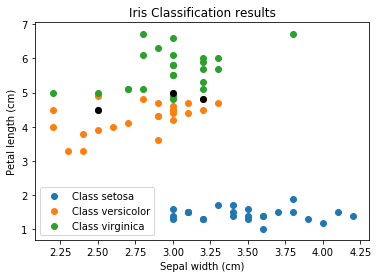

In [246]:
#plotting two dimensions
print(('ScatterPlot showing the different species correctly classified against the sample species \
incorrectly classified (in black points)').upper())

for n in np.unique(test_y):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx,1], test_X[idx,2], label = 'Class %s' %str(iris.target_names[n]))
plt.scatter(test_X[incorrect_class, 1], test_X[incorrect_class, 2], c= 'k')#misclassified samples
plt.xlabel(str(iris.feature_names[1]).capitalize())
plt.ylabel(str(iris.feature_names[2]).capitalize())
plt.title('Iris Classification results', color= 'k')
plt.legend(loc = 'best');